# __Описание данных__
* Date — дата
* AveragePrice — средняя цена одного авокадо
* Total Volume — количество проданных авокадо
* 4046 — количество проданных авокадо PLU* 4046
* 4225 — количество проданных авокадо PLU 4225
* 4770 — количество проданных авокадо PLU 4770
* Total Bags — всего упаковок
* Small Bags — маленькие упаковки
* Large Bags — большие
* XLarge Bags — очень большие
* type — обычный или органический
* year — год
* Region — город или регион the city or region of the observation
* *PLU — код товара (Product Lookup code)

In [41]:
import wget
import pandas as pd

import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
url = 'https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv'
avocado_df = pd.read_csv(wget.download(url), parse_dates=['Date'])

##### __Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.__

In [8]:
avocado_df.head()

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


In [9]:
round(avocado_df.AveragePrice.rolling(window=3).mean().max(), 2)

1.85

__Задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50)__

In [10]:
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize':(12,8)}
)

C:\Temp\ipykernel_3348\2347229902.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  t_df = avocado_df.rolling(window).mean()
C:\Temp\ipykernel_3348\2347229902.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  t_df = avocado_df.rolling(window).mean()
C:\Temp\ipykernel_3348\2347229902.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  t_df = avocado_df.rolling(window).mean()
C:\Temp\ipykernel_3348\2347229902.py:4: 

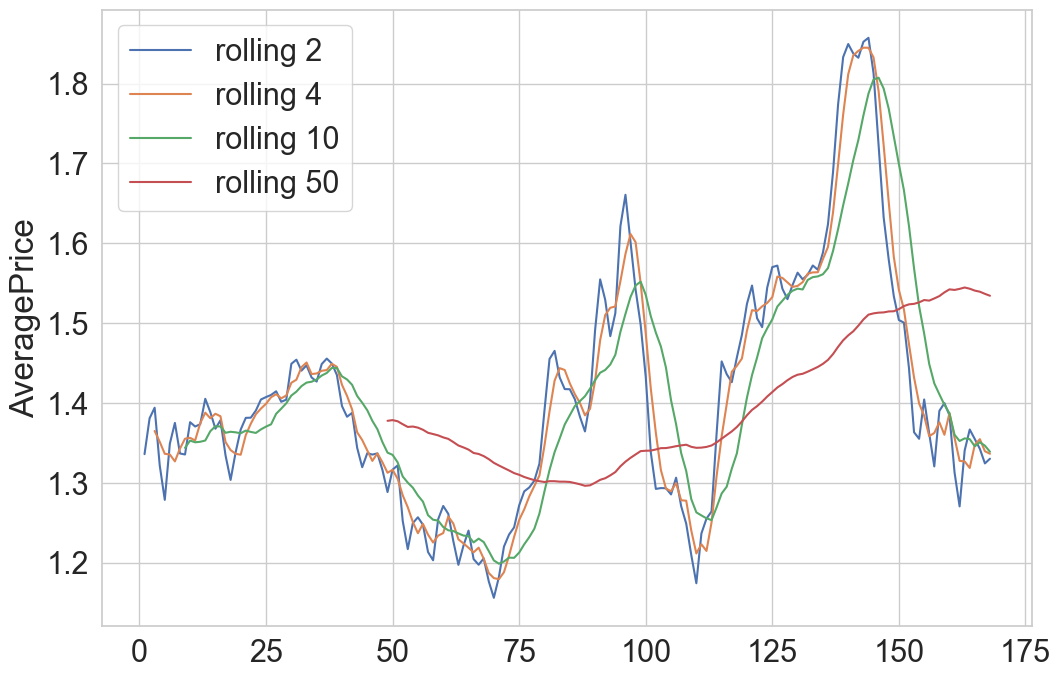

In [12]:
windows = [2, 4, 10, 50]

for window in windows:
    t_df = avocado_df.rolling(window).mean()
    sns.lineplot(x=t_df.index, y=t_df.AveragePrice, label=f'rolling {window}')


__Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее.__

In [16]:
avocado_df.ewm(span=2).mean()

C:\Temp\ipykernel_3348\282093845.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  avocado_df.ewm(span=2).mean()


,AveragePrice
0,1.301296
1,1.353310
2,1.379480
3,1.391394
4,1.294758
...,...
164,1.356212
165,1.352194
166,1.340793
167,1.322734


__Импортируем полные данные и для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.__

In [20]:
full_data_df = pd.read_csv(wget.download('https://stepik.org/media/attachments/lesson/362453/avocado_full.csv'), index_col=0)
full_data_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [24]:
temp_df = full_data_df[
    (full_data_df['type'] == 'organic') & (full_data_df['region'] == 'Chicago')].AveragePrice

rolling_mean = temp_df.rolling(window=4).mean()
ewm_df = temp_df.ewm(span=4).mean()

<AxesSubplot: xlabel='Date'>

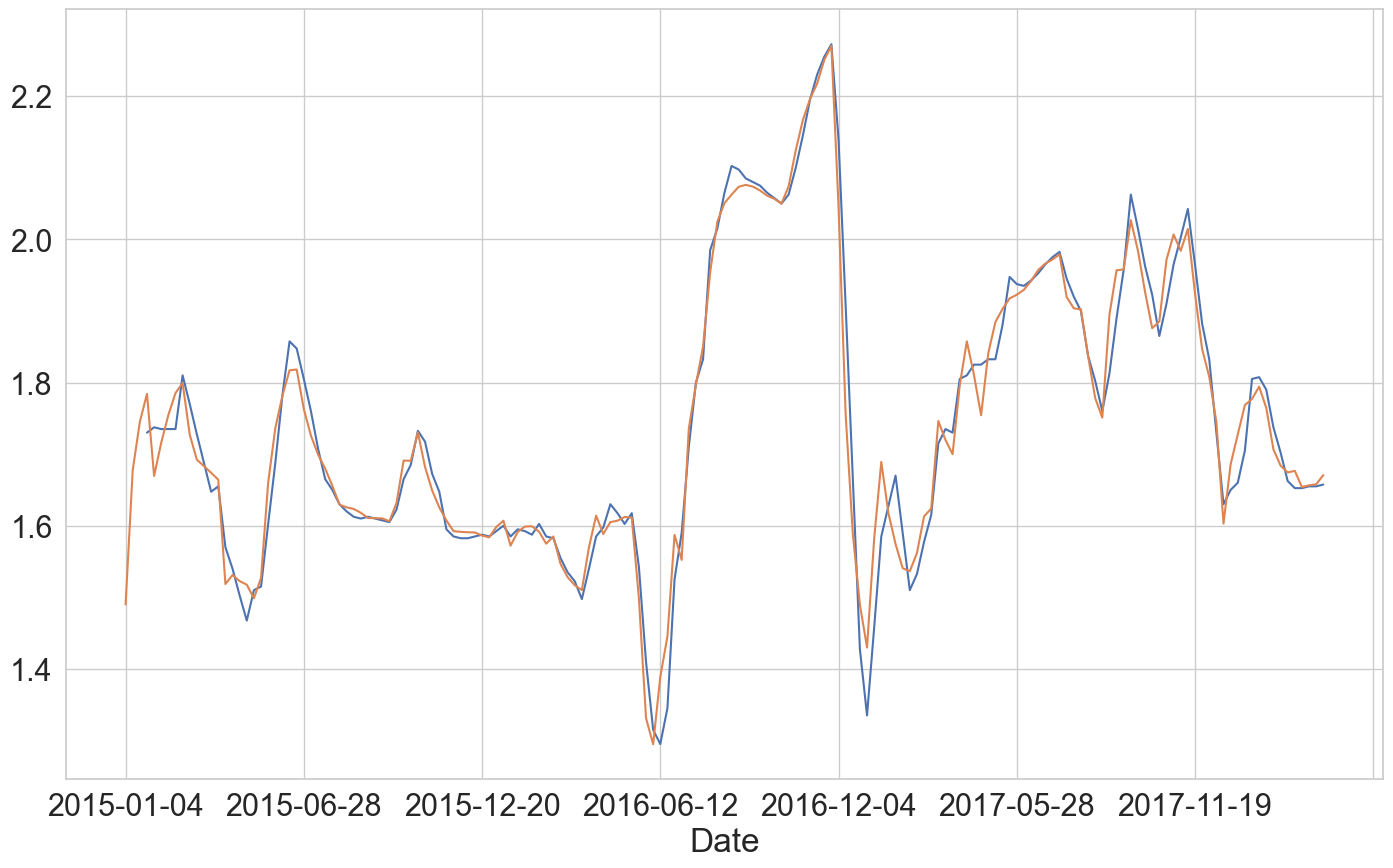

In [28]:
plt.figure(figsize=(17,10))
rolling_mean.plot()
ewm_df.plot()

__Загрузим и подготовим данные__

In [30]:
delay_deal_df = pd.read_csv(wget.download('https://stepik.org/media/attachments/course/72204/delays.csv'))
delay_deal_df.head()

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844


In [31]:
delay_deal_df.dtypes

client_id      int64
company_id     int64
delay         object
revenue        int64
dtype: object

__Переведем серию delay в формат timedelta, но сначала нужно избавиться от 'минуса' перед датой__

In [33]:
delay_deal_df.delay = delay_deal_df.delay.str.replace('-', '')
delay_deal_df.delay = pd.to_timedelta(delay_deal_df.delay)
delay_deal_df.dtypes

client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object

__Разобьем величину опоздания на промежутки__

In [37]:
delay_deal_df['delay_categorical'] = pd.cut(delay_deal_df.delay, bins=3)
delay_deal_df.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."


In [40]:
delay_deal_df.delay_categorical = pd.cut(
    delay_deal_df.delay, pd.to_timedelta(['0 days', '1 days', '2 days', '3 days', delay_deal_df.delay.max()]),
    labels = ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']
    )
delay_deal_df.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days


__Теперь построим интерактивный барплот с тем, насколько часто задерживаются сделки.__

In [50]:
delay_distribution_df = (delay_deal_df
                        .groupby('delay_categorical')
                        .agg({'revenue': 'count'})
                        .rename(columns={'revenue': 'count'})
                        .sort_values('count', ascending=False)
                        )


<AxesSubplot: xlabel='delay_categorical'>

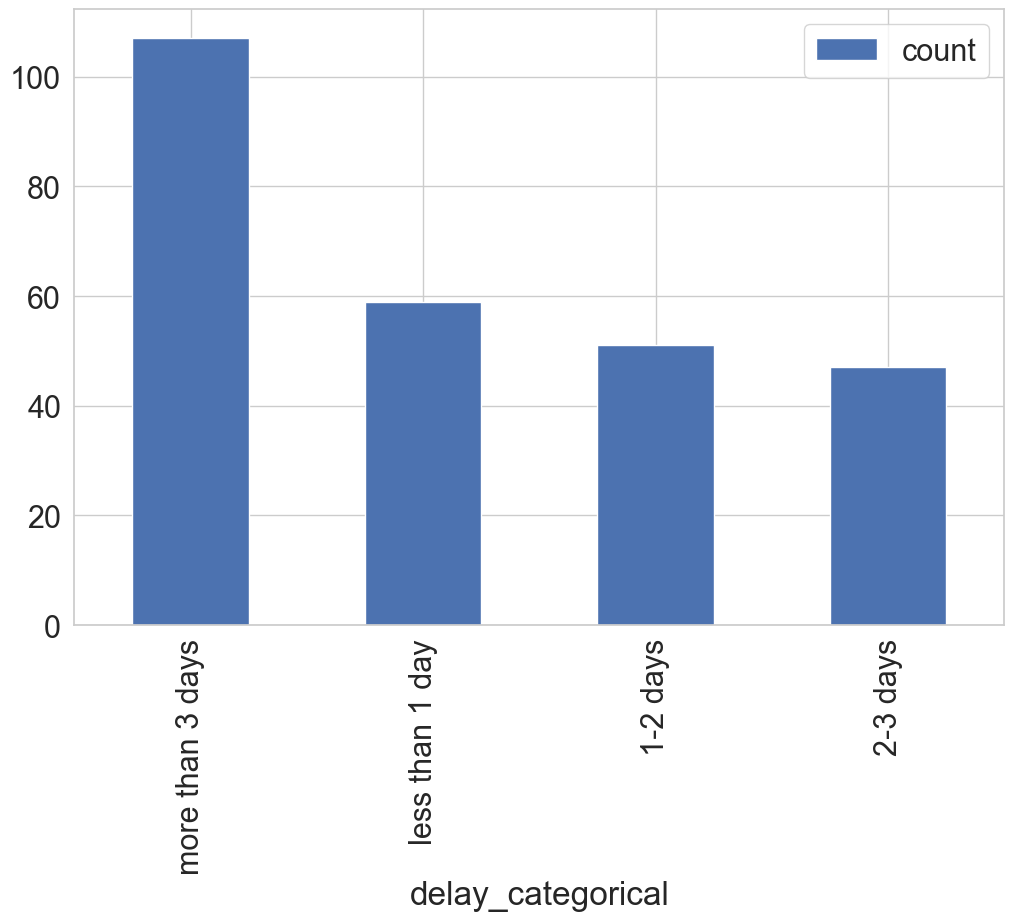

In [55]:
delay_distribution_df.plot(kind='bar')